In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ポアソン分布の学習と予測
共役事前分布 : Gamma分布

In [32]:
from scipy.stats import poisson
from scipy.stats import gamma

# 訓練データの生成
mu = 5 # lambda
size = 30

x =poisson.rvs(mu=mu,size=size)
x

array([ 6, 12,  4,  5,  7, 13,  9, 13,  3,  6,  7,  6,  5,  6,  7,  6,  6,
        6, 13,  3,  6,  6,  2,  1,  3,  3,  5,  7,  5,  4])

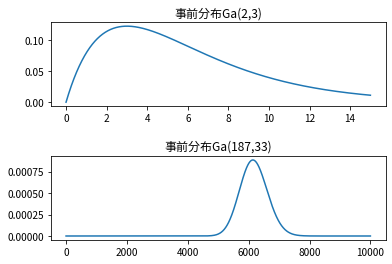

ベイズ推定量 : 5.666667


In [39]:
# 事前分布のパラメータ
alpha_pre,beta_pre = 2,3

alpha_pro = alpha_pre + x.sum()
beta_pro =  beta_pre + size

xscale_pre = np.linspace(0,15,1500)
xscale_pro = np.linspace(0,10000,10000)
prob_pre = gamma.pdf(xscale_pre,a=alpha_pre,scale=beta_pre)
prob_pro = gamma.pdf(xscale_pro,a=alpha_pro,scale=beta_pro)
plt.figure(facecolor="white")
plt.subplot(2,1,1)
plt.plot(xscale_pre,prob_pre)
plt.title("事前分布Ga("+str(alpha_pre)+","+str(beta_pre)+")")

plt.subplot(2,1,2)
plt.plot(xscale_pro,prob_pro)
plt.title("事前分布Ga("+str(alpha_pro)+","+str(beta_pro)+")")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

print("ベイズ推定量 : %lf" %(alpha_pro/beta_pro))

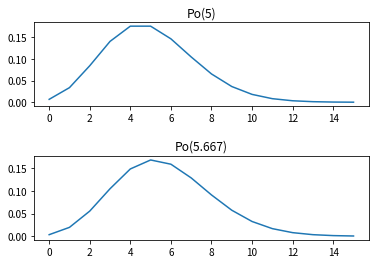

In [34]:
# サンプルを生成したモデルとベイズ推定量に基づいたモデルを比較
xscale = np.linspace(0,15,16)

gen_dist = poisson.pmf(xscale,mu=mu) # 生成元の分布
est_dist = poisson.pmf(xscale,mu=alpha_pro/beta_pro) # ベイズ推定量に基づいた分布

plt.figure(facecolor="white")
plt.subplot(2,1,1)
plt.plot(xscale,gen_dist)
plt.title("Po("+str(mu)+")")

plt.subplot(2,1,2)
plt.plot(xscale,est_dist)
plt.title("Po("+str(round(alpha_pro/beta_pro,3))+")")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()